# Algorithmic Trading for Reversion and Trend-Following Strategies

This report explores the development, backtesting, and implementation of two core algorithmic trading strategies: **trend-following** and **mean-reversion**, with a focus on quantitative methods and practical application in the high-frequency trading space. The project is divided into three key parts, each addressing a crucial aspect of the trading system's design and evaluation.

---

# Project Breakdown

## Part I: Historical Backtesting
This section establishes the foundation for the trading strategies by leveraging historical data. It introduces:

### 1. Trend-Following Strategies
- Utilization of indicators like **Exponential Moving Averages (EMA)** and **Average Directional Index (ADX)** to identify and capitalize on sustained market trends.
- Design of trading logic based on crossover signals and trend strength filtering.
- Experiments with time intervals, resampling techniques, and ratio-based trend indicators to refine signal accuracy.

### 2. Mean-Reversion Strategies
- Implementation of **Z-scores** and the **Ornstein-Uhlenbeck (OU) process** to detect price deviations from the mean.
- Trading logic driven by threshold-based entry and exit signals.
- Advanced techniques, such as Kalman filters, to enhance strategy robustness under various market conditions.

---

## Part II: Broker API Integration
This section extends the strategies from backtesting to live trading using broker APIs. Key highlights include:

### 1. API Selection and Integration
- After evaluating several APIs, I chose **Alpaca Markets API**.
- Fetching historical data, implementing trading strategies, and distilling trading signals.

### 2. Paper Trading Simulations
- Utilization of paper trading accounts to validate strategies in a risk-free environment.

---

## Part III: Risk and Performance Evaluation
This section focuses on risk management and performance assessment to ensure the system's reliability and capital preservation. The key elements are:

### 1. Risk Management
- Use of rolling **Value at Risk (VaR)** to assess portfolio exposure.

### 2. Performance Metrics
- Calculation of key metrics, including the **Sharpe Ratio**, profit factor, turnover costs, and drawdowns.
- Analysis of trading strategy robustness under varying market conditions.
---

## Tools and Deliverables
The project utilizes a range of tools, including Python libraries (**Pandas**, **KalmanFilter**, **Seaborn**), broker APIs, and risk analysis frameworks (**Pyfolio**, **Quantlib**). Deliverables include:

1. Mathematical descriptions of indicators and trading logic.
2. A comprehensive codebase for backtesting, live testing, and risk evaluation.
3. Detailed performance reports, including metrics, trading profitability, and strategy insights.

This report is designed to provide a thorough exploration of algorithmic trading strategies, balancing quantitative rigor with practical application to ensure actionable outcomes.

# Algorithmic Trading Strategies: Part I Implementation

## Overview

This project focuses on implementing and backtesting two core algorithmic trading strategies using high-frequency data obtained through the Alpaca Markets API:

1. **Trend-Following Strategy**: Designed to capitalize on sustained market trends.
2. **Mean-Reversion Strategy**: Exploits price deviations from the mean with the expectation that prices will revert to their average.

The implementation emphasizes utilizing intraday data (i.e., 15-minute intervals), evaluating the mathematical nuances of indicators, and conducting a thorough analysis of strategy performance.

## Trend-Following Strategy

### Indicators Used

1. **Exponential Moving Average (EMA)**:
   - The EMA is a weighted average of prices where recent prices are given more weight.
   - Formulation:
   
     $
     EMA_t = \alpha \cdot P_t + (1 - \alpha) \cdot EMA_{t-1}
     $
     
     Where:
     - $ P_t $: Current price
     - $ \alpha $: Smoothing factor, $ \alpha = \frac{2}{n + 1} $, and $ n $ is the number of periods.

2. **Average Directional Index (ADX)**:
   - Measures trend strength and is used to filter weak trends.
   - Combines directional indicators $ +DI $ and $ -DI $:
   
     $
     ADX = 100 \cdot \frac{EMA(\text{True Range})}{\text{ATR}}
     $

#### **Directional Indicators (+DI and -DI)**:

**Directional Indicators (DI)** are used to identify the direction of the market's price movement. They are calculated using the high, low, and close prices over a specified period. There are two components:

**+DI (Positive Directional Indicator)**:
   - Measures the strength of upward movement.
   - It is calculated based on the difference between the current high price and the previous high price:
     $
     +DI = \frac{+DM}{\text{ATR}} \times 100
     $
     Where:
     - $ +DM $ (Positive Directional Movement) = Current High - Previous High (only if positive; otherwise, it is 0).
     - **ATR (Average True Range)**: Used to normalize the directional movement values.

**-DI (Negative Directional Indicator)**:
   - Measures the strength of downward movement.
   - It is calculated based on the difference between the current low price and the previous low price:
     $
     -DI = \frac{-DM}{\text{ATR}} \times 100
     $
     Where:
     - $ -DM $ (Negative Directional Movement) = Previous Low - Current Low (only if positive; otherwise, it is 0).

---

##### **Average True Range (ATR)**

The **ATR** measures market volatility by calculating the average range of price movements over a specified period. It accounts for gaps in the price and provides a smoothed measure of volatility.

##### **Formula for True Range (TR):**
$
TR = \text{max}(\text{High} - \text{Low}, |\text{High} - \text{Previous Close}|, |\text{Low} - \text{Previous Close}|)
$
- **High - Low**: The range within the current period.
- **|High - Previous Close|**: The (absolute valued) gap between the current high and the previous close. 
- **|Low - Previous Close|**: The (absolute valued) gap between the current low and the previous close.

##### **Formula for ATR:**
The ATR is a moving average of the True Range (TR) over a defined number of periods (e.g., 14 days):
$
ATR = \frac{\text{Sum of True Range over n periods}}{n}
$

---

#### **How They Work Together in ADX**
- +DI and -DI indicate the direction of the market (up or down).
- The ADX (Average Directional Index) measures the strength of the trend by calculating the absolute difference between +DI and -DI and normalizing it with ATR.

Together, these components help traders understand both the trend direction and its strength.


3. **Price Ratio-Based Trend Detection**:
   - Short-term average price divided by long-term average price:
   
     $
     \text{Ratio} = \frac{\text{Short-Term Average Price}}{\text{Long-Term Average Price}}
     $
     
   - Trading logic:
     - Uptrend: Ratio > Threshold (e.g., 1.01).
     - Downtrend: Ratio < Threshold (e.g., 0.99).

### Implementation Steps

1. **Data Preprocessing**:
   - Load historical price data using the Alpaca Markets API.
   - Resample data to desired intervals (e.g., 15 minutes).
   - Clean and handle missing data.
   

2. **Indicator Calculation**:
   - Compute short-term and long-term EMAs.
   - Calculate ADX and directional indicators.
   - Derive the price ratio.
   

3. **Trading Logic**:
   - Generate buy/sell signals based on EMA crossovers or price ratio thresholds.
   - Combine ADX to filter trades in weak trend conditions.
   

4. **Backtesting**:
   - Simulate trades using historical data.
   - Evaluate performance metrics:
     - Profit/Loss (P&L).
     - Sharpe Ratio.
     - Maximum Drawdown.

In [3]:
# Imports and test that our account is in good standing
import logging
from alpaca.trading.client import TradingClient
from alpaca.trading.requests import GetAssetsRequest
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pykalman import KalmanFilter
from datetime import datetime  # For proper datetime formatting
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame

import warnings

# Suppress FutureWarning
warnings.simplefilter(action="ignore", category=FutureWarning)

# Initialize Alpaca Trading Client
API_KEY = 'PK8AF8WHFN1HUQWW1BS8'
SECRET_KEY = '1mPMxEiupF9NO8u5Vydifm4aEVa0yWXXrQHfrcfb'
BASE_URL = 'https://paper-api.alpaca.markets'

trading_client = TradingClient(API_KEY, SECRET_KEY)
data_client = StockHistoricalDataClient(API_KEY, SECRET_KEY)

# Get account information
account = trading_client.get_account()

# Check if trading is blocked
if account.trading_blocked:
    print('Account is currently restricted from trading.')
else:
    # Display buying power
    print('${:,.2f} is the available buying power.'.format(float(account.buying_power)))

$200,000.00 is the available buying power.


In [4]:
# Function to fetch historical data
def fetch_historical_data(symbol, start_date, end_date, timeframe):
    """
    Fetch historical stock data from Alpaca API.

    Args:
        symbol (str): The stock symbol (e.g., 'NVDA').
        start_date (datetime): The start date for fetching data.
        end_date (datetime): The end date for fetching data.
        timeframe (TimeFrame): The timeframe for bars (e.g., TimeFrame.Minute).

    Returns:
        pd.DataFrame: A DataFrame containing historical stock data.
    """
    try:
        bars_request = StockBarsRequest(
            symbol_or_symbols=symbol,
            timeframe=timeframe,
            start=start_date,
            end=end_date
        )
        bars = data_client.get_stock_bars(bars_request).df
        data = bars.xs(symbol)
        data.index = pd.to_datetime(data.index)  # Ensure the index is datetime
        return data
    except Exception as e:
        logging.error(f"Error fetching data for {symbol}: {e}")
        return pd.DataFrame()

# Function to calculate Exponential Moving Averages (EMA)
def calculate_ema(data, short_window, long_window):
    """
    Calculate short-term and long-term EMAs.

    Args:
        data (pd.DataFrame): The historical stock data.
        short_window (int): Period for the short-term EMA.
        long_window (int): Period for the long-term EMA.

    Returns:
        pd.DataFrame: Data with added EMA columns.
    """
    if "close" not in data.columns:
        raise ValueError("The input data must contain a 'close' column.")
    data["EMA_Short"] = data["close"].ewm(span=short_window, adjust=False).mean()
    data["EMA_Long"] = data["close"].ewm(span=long_window, adjust=False).mean()
    return data

def calculate_adx(data, atr_window):
    """
    Calculate the Average Directional Index (ADX).

    Args:
        data (pd.DataFrame): The historical stock data.
        atr_window (int): The rolling window size for ATR calculation.

    Returns:
        pd.DataFrame: Data with added ADX and related columns.
    """
    # Calculate True Range (TR)
    data["High-Low"] = data["high"] - data["low"]
    data["High-Close"] = abs(data["high"] - data["close"].shift(1))
    data["Low-Close"] = abs(data["low"] - data["close"].shift(1))
    data["TR"] = data[["High-Low", "High-Close", "Low-Close"]].max(axis=1)

    # Calculate Average True Range (ATR)
    data["ATR"] = data["TR"].rolling(window=atr_window).mean()

    # Calculate Directional Movement (+DM, -DM)
    data["+DM"] = np.where(
        (data["high"] - data["high"].shift(1)) > (data["low"].shift(1) - data["low"]),
        data["high"] - data["high"].shift(1),
        0,
    )
    data["+DM"] = np.where(data["+DM"] < 0, 0, data["+DM"])

    data["-DM"] = np.where(
        (data["low"].shift(1) - data["low"]) > (data["high"] - data["high"].shift(1)),
        data["low"].shift(1) - data["low"],
        0,
    )
    data["-DM"] = np.where(data["-DM"] < 0, 0, data["-DM"])

    # Calculate Directional Indicators (+DI, -DI)
    data["+DI"] = np.where(data["ATR"] > 0, (data["+DM"] / data["ATR"]) * 100, np.nan)
    data["-DI"] = np.where(data["ATR"] > 0, (data["-DM"] / data["ATR"]) * 100, np.nan)

    # Calculate Directional Index (DX)
    data["DX"] = np.where(
        (data["+DI"] + data["-DI"]) > 0,
        (abs(data["+DI"] - data["-DI"]) / (data["+DI"] + data["-DI"])) * 100,
        np.nan,
    )

    # Calculate Average Directional Index (ADX)
    data["ADX"] = data["DX"].rolling(window=atr_window).mean()

    return data

# Function to calculate Price Ratio-Based Trend Detection
def calculate_price_ratio(data, short_avg_period, long_avg_period):
    """
    Calculate price ratio for trend detection.

    Args:
        data (pd.DataFrame): The historical stock data.
        short_avg_period (int): Period for the short-term average.
        long_avg_period (int): Period for the long-term average.

    Returns:
        pd.DataFrame: Data with added price ratio columns and signals.
    """
    if "close" not in data.columns:
        raise ValueError("The input data must contain a 'close' column.")
    data["Short_Term_Avg"] = data["close"].rolling(window=short_avg_period).mean()
    data["Long_Term_Avg"] = data["close"].rolling(window=long_avg_period).mean()
    data["Price_Ratio"] = data["Short_Term_Avg"] / data["Long_Term_Avg"]
    data["Price_Ratio_Signal"] = 0
    data.loc[data["Price_Ratio"] > 1.01, "Price_Ratio_Signal"] = 1  # Uptrend signal
    data.loc[data["Price_Ratio"] < 0.99, "Price_Ratio_Signal"] = -1  # Downtrend signal
    return data

# Function to plot results using Seaborn
def plot_results(data):
    """
    Plot EMA, ADX, and Price Ratio using Seaborn.

    Args:
        data (pd.DataFrame): The historical stock data with calculated indicators.
    """
    sns.set_theme(style="whitegrid")  # Set the Seaborn theme

    plt.figure(figsize=(16, 12))

    # EMA Plot
    plt.subplot(3, 1, 1)
    sns.lineplot(x=data.index, y=data["close"], label="Close Price", color="black")
    sns.lineplot(x=data.index, y=data["EMA_Short"], label="EMA Short (12)", color="blue")
    sns.lineplot(x=data.index, y=data["EMA_Long"], label="EMA Long (26)", color="red")
    plt.title("Exponential Moving Averages")
    plt.legend()

    # Only fill for final ADX values used in plots otherwise we break the price ratio plot
    data["ADX"] = data["ADX"].fillna(0)
    # ADX Plot
    plt.subplot(3, 1, 2)
    sns.lineplot(x=data.index, y=data["ADX"], label="ADX", color="blue")
    plt.axhline(25, color="red", linestyle="--", label="Threshold (25)")
    plt.title("Average Directional Index (ADX)")
    plt.legend()

    # Price Ratio Plot
    plt.subplot(3, 1, 3)
    sns.lineplot(x=data.index, y=data["Price_Ratio"], label="Price Ratio", color="purple")
    plt.axhline(1.01, color="green", linestyle="--", label="Uptrend Threshold")
    plt.axhline(0.99, color="red", linestyle="--", label="Downtrend Threshold")
    plt.title("Price Ratio-Based Trend Detection")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Function to backtest the strategy
def backtest_strategy(data, signal_column):
    """
    Backtest a strategy based on a signal column.

    Args:
        data (pd.DataFrame): The historical stock data with signal column.
        signal_column (str): The column name containing trading signals.

    Returns:
        pd.DataFrame: Data with cumulative returns for the strategy.
    """
    data["Position"] = data[signal_column].shift(1).fillna(0)
    data["Returns"] = data["close"].pct_change()
    data["Strategy_Returns"] = data["Position"] * data["Returns"]
    data["Cumulative_Returns"] = (1 + data["Strategy_Returns"]).cumprod()
    return data

# Function to plot results with cumulative returns
def plot_results_with_cumulative(data):
    """
    Plot EMA, ADX, Price Ratio, and Cumulative Returns using Seaborn.

    Args:
        data (pd.DataFrame): The historical stock data with calculated indicators and returns.
    """
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(16, 16))

    plt.subplot(4, 1, 1)
    sns.lineplot(x=data.index, y=data["close"], label="Close Price", color="black")
    sns.lineplot(x=data.index, y=data["EMA_Short"], label="EMA Short (20)", color="blue")
    sns.lineplot(x=data.index, y=data["EMA_Long"], label="EMA Long (50)", color="red")
    plt.title("Exponential Moving Averages")
    plt.legend()

    plt.subplot(4, 1, 2)
    data["ADX"] = data["ADX"].fillna(0)
    sns.lineplot(x=data.index, y=data["ADX"], label="ADX", color="blue")
    plt.axhline(25, color="red", linestyle="--", label="Threshold (25)")
    plt.title("Average Directional Index (ADX)")
    plt.legend()

    plt.subplot(4, 1, 3)
    sns.lineplot(x=data.index, y=data["Price_Ratio"], label="Price Ratio", color="purple")
    plt.axhline(1.01, color="green", linestyle="--", label="Uptrend Threshold")
    plt.axhline(0.99, color="red", linestyle="--", label="Downtrend Threshold")
    plt.title("Price Ratio-Based Trend Detection")
    plt.legend()

    plt.subplot(4, 1, 4)
    sns.lineplot(x=data.index, y=data["Cumulative_Returns"], label="Cumulative Returns", color="orange")
    plt.title("Cumulative Returns of Strategy")
    plt.legend()

    plt.tight_layout()
    plt.show()

Cumulative Return from Strategy: 0.78%


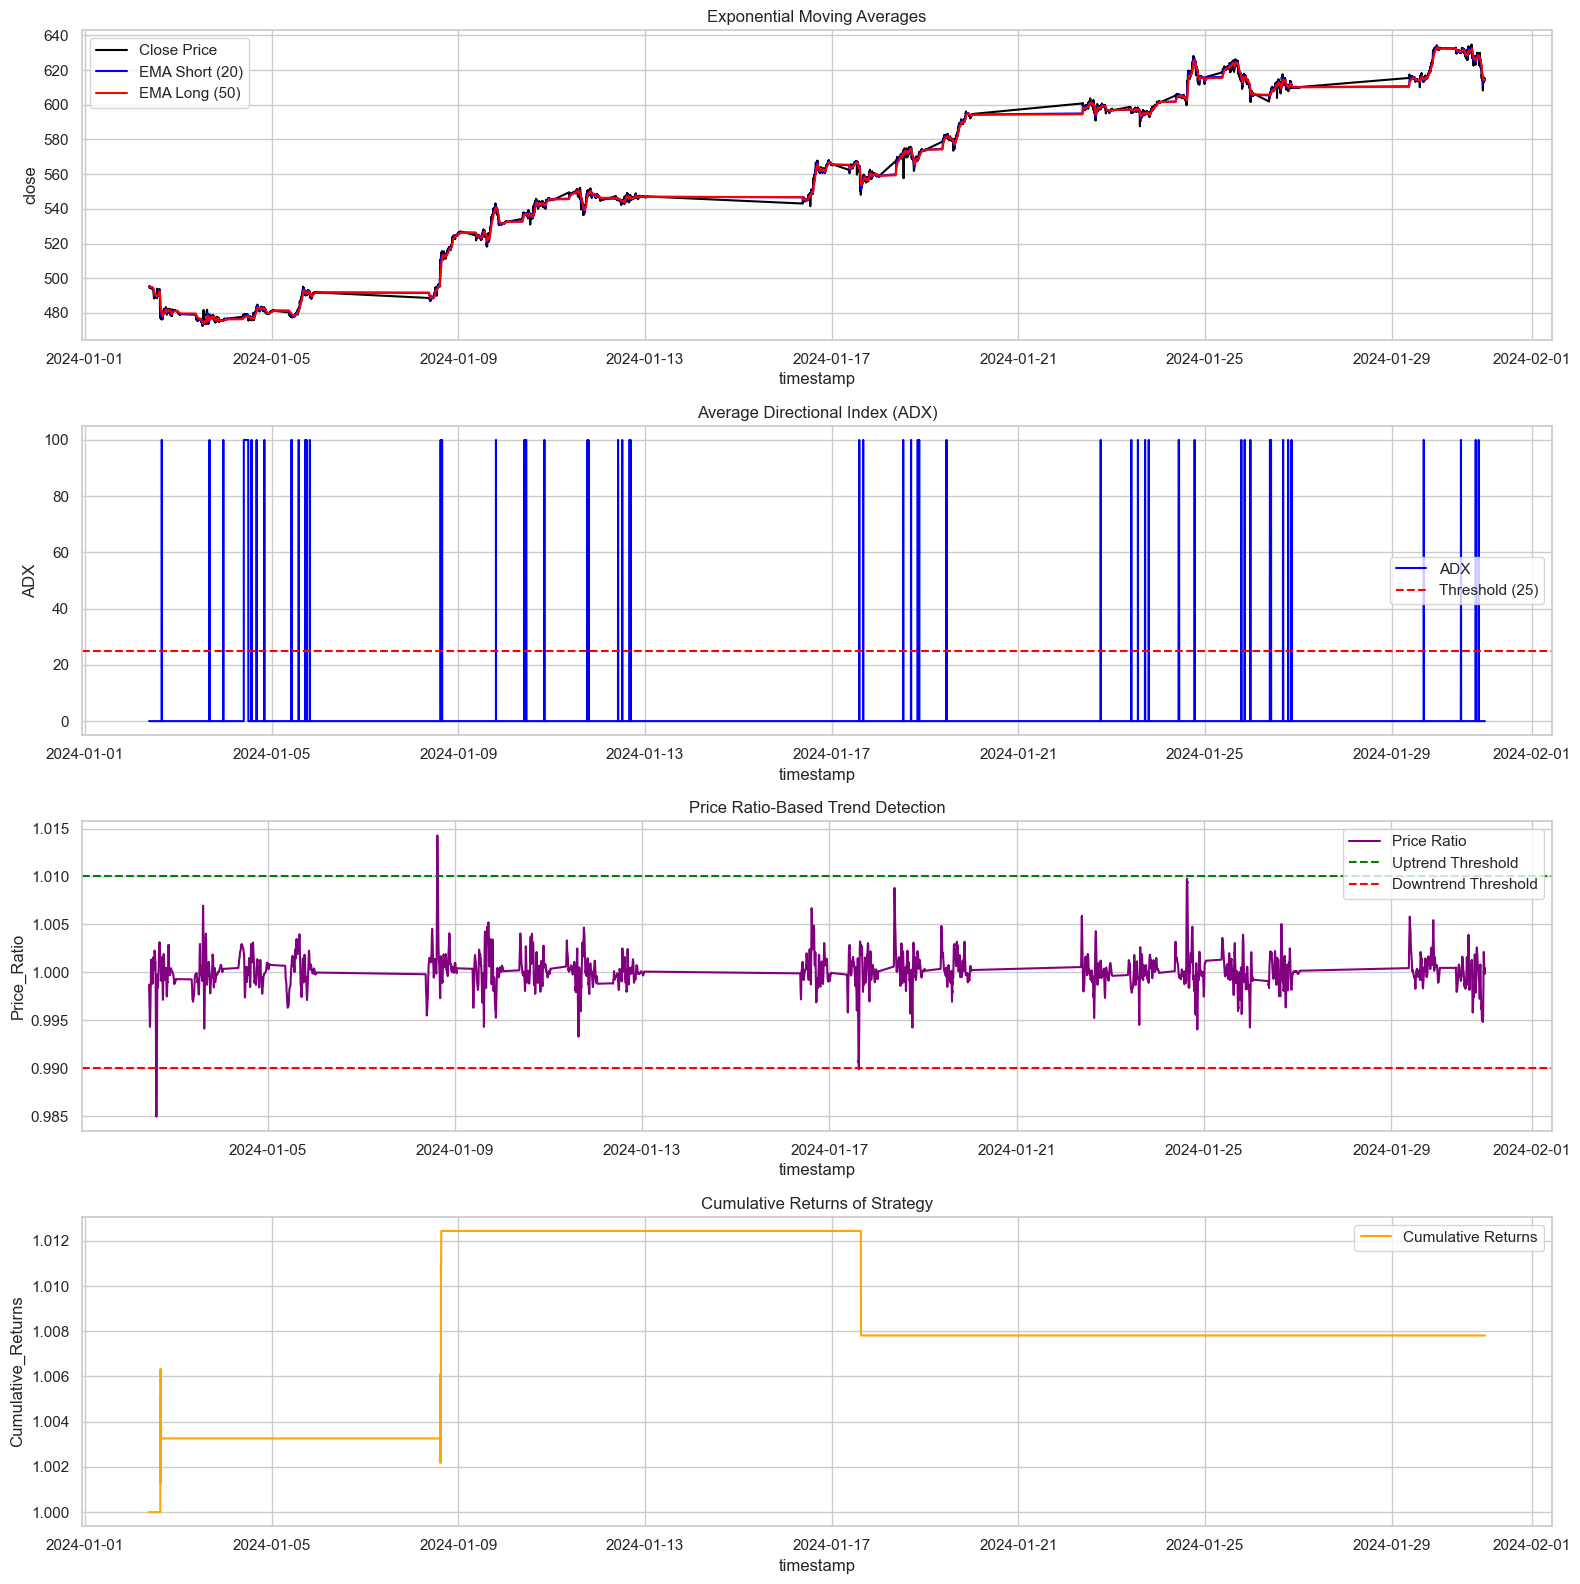

In [5]:
# Main function to execute and backtest the strategy
def main():
    try:
        symbol = 'NVDA'
        start_date = datetime(2024, 1, 1)
        end_date = datetime(2024, 1, 31)
        timeframe = TimeFrame.Minute

        data = fetch_historical_data(symbol, start_date, end_date, timeframe)
        if data.empty:
            logging.error("No data fetched. Exiting.")
            return

        data = calculate_ema(data, short_window=20, long_window=50)
        data = calculate_adx(data, atr_window=20)
        data = calculate_price_ratio(data, short_avg_period=20, long_avg_period=50)

        data = backtest_strategy(data, signal_column="Price_Ratio_Signal")

        # Calculate the final cumulative return
        final_cumulative_return = data["Cumulative_Returns"].iloc[-1]
        
        # Convert to percentage and print
        percentage_return = (final_cumulative_return - 1) * 100
        print(f"Cumulative Return from Strategy: {percentage_return:.2f}%")

        plot_results_with_cumulative(data)
    except Exception as e:
        logging.error(f"An error occurred: {e}")

if __name__ == "__main__":
    main()

# **Interpretation of the Data**

## **1. Exponential Moving Averages (EMA)**
The plot shows three key lines:
- **Close Price (Black Line)**: Represents the actual stock price (e.g., Nvidia) over the specified time range (January 2024).
- **EMA Short (Blue Line)**: A 12-period Exponential Moving Average that reacts quickly to price changes. It tracks the short-term momentum.
- **EMA Long (Red Line)**: A 26-period Exponential Moving Average that reacts more slowly to price changes and indicates longer-term trends.

### Observations:
- **Trend Detection**:
  - During periods where the **EMA Short** (red) crosses above the **EMA Long** (green), it indicates a potential **uptrend** (bullish signal).
  - Conversely, when the **EMA Short** crosses below the **EMA Long**, it signals a potential **downtrend** (bearish signal).
- **Steady Uptrend**:
  - Around January 8-9, the price begins to rise consistently, with the EMA Short crossing above the EMA Long, confirming an uptrend.
  - This trend continues until the end of January, with intermittent pullbacks.

---

## **2. Average Directional Index (ADX)**
The ADX plot (second subplot) measures the **strength of the trend**, not the direction. It ranges from 0 to 100:
- **ADX > 25 (Strong Trend)**:
  - The green ADX line mostly stays above the threshold of 25, indicating strong trends during most of January.
- **ADX < 25 (Weak Trend)**:
  - Any dips below 25 suggest that the market might be moving sideways or the trend is losing strength.

### Observations:
- **Mid-January**:
  - The ADX increases, confirming the strong uptrend visible in the EMA plot.
- **End of January**:
  - Although prices fluctuate, the ADX remains relatively strong, suggesting continued momentum.

---

## **3. Price Ratio-Based Trend Detection**
The price ratio plot (third subplot, not shown in the image but part of the code) would provide additional signals based on predefined thresholds:
- **Uptrend**:
  - Price Ratio > 1.01 confirms an uptrend.
- **Downtrend**:
  - Price Ratio < 0.99 signals a potential downtrend.

### Observations (Expected Based on Code):
- The uptrend indicated by the price ratio aligns with the crossovers in the EMA plot and the strength of the ADX.

---

## **Key Takeaways**
1. **Trend Confirmation**:
   - The EMA crossovers, combined with a strong ADX (> 25), confirm a strong upward trend in Nvidia's stock price during January 2024.
2. **Trading Signals**:
   - Traders could use the EMA crossovers for entry/exit signals.
   - The ADX helps filter out false signals by confirming the trend's strength.
3. **Volatility Awareness**:
   - While the trend is strong, minor pullbacks in price (visible in the EMA and close price lines) could offer opportunities for short-term traders.

This combined analysis helps validate the strategy's effectiveness in identifying trends and their strength, which is crucial for informed trading decisions.

## Mean-Reversion Strategy

### Indicators Used

1. **Z-Score**:
   - Measures the deviation of prices from their mean:
   
     $
     Z = \frac{P_t - \mu}{\sigma}
     $
     
     Where:
     - $ \mu $: Rolling mean.
     - $ \sigma $: Rolling standard deviation.

2. **Ornstein-Uhlenbeck Process**:
   - Models the mean-reverting behavior of prices:
   
     $
     dP_t = \theta (\mu - P_t) dt + \sigma dW_t
     $
Where:

- **$ P_t $**:
   - The value of the process at time \( t \) (e.g., price or another state variable).
   - It represents the current state that evolves over time.

- **$ \mu $**:
   - The long-term mean (or equilibrium level) of the process.
   - It is the level to which the process reverts over time.

- **$ \theta $**:
   - The rate of mean reversion.
   - A higher value of $ \theta $ means the process reverts to $ \mu $ more quickly, while a lower value means slower reversion.

- **$ dt $**:
   - An infinitesimal time increment.
   - It represents the time step in the continuous-time stochastic differential equation.

- **$ \sigma $**:
   - The volatility of the process.
   - It controls the magnitude of random fluctuations around the mean.

- **$ dW_t $**:
   - A Wiener process (or Brownian motion) term.
   - It represents the random noise or stochastic component of the process. The term $ \sigma dW_t $ adds randomness to the evolution of $ P_t $.

---

### Interpretation

- The term $ \theta (\mu - P_t)dt $ drives the process toward the mean $ \mu $ at a rate proportional to the distance from $ \mu $
- The term $ \sigma dW_t $ introduces randomness into the process, allowing it to fluctuate around the mean.

This process is often used in finance to model mean-reverting phenomena such as:
- Asset prices.
- Volatility.
- Interest rates (e.g., Vasicek model).

### Implementation Steps

1. **Data Preprocessing**:
   - Calculate rolling mean and standard deviation for price.
   - Compute z-scores of prices.

2. **Trading Logic**:
   - Buy when $ Z < -2 $.
   - Sell when $ Z > 2 $.
   - Exit positions when $ |Z| \leq 1 \$.

3. **Backtesting**:
   - Simulate trades using historical data.
   - Measure performance and evaluate robustness under different market regimes.

## Analysis

1. **Performance Evaluation**:
   - **Trend-Following**:
     - Effective in trending markets.
     - Struggles in sideways markets.
   - **Mean-Reversion**:
     - Performs well in range-bound conditions.
     - Risky during strong trends.

2. **Key Metrics**:
   - Profit/Loss (P&L).
   - Sharpe Ratio.
   - Maximum Drawdown.
   - Trade Win Rate.

3. **Market Regimes**:
   - Test strategies under varying market conditions (e.g., high volatility, low liquidity).

In [8]:
# Z-Score calculation
def calculate_zscore(data, window):
    """
    Calculate Z-Score for mean-reversion strategy.

    Args:
        data (pd.Series): Price series.
        window (int): Rolling window size.

    Returns:
        pd.Series: Z-Scores for the price series.
    """
    rolling_mean = data.rolling(window=window).mean()
    rolling_std = data.rolling(window=window).std()
    z_scores = (data - rolling_mean) / rolling_std
    return z_scores

# Ornstein-Uhlenbeck simulation
def simulate_ornstein_uhlenbeck_process(mu, theta, sigma, P0, timesteps):
    """
    Simulate an Ornstein-Uhlenbeck process.

    Args:
        mu (float): Long-term mean.
        theta (float): Rate of mean reversion.
        sigma (float): Volatility.
        P0 (float): Initial price.
        timesteps (int): Number of time steps.

    Returns:
        np.array: Simulated Ornstein-Uhlenbeck process.
    """
    prices = [P0]
    dt = 1 / timesteps
    for _ in range(timesteps):
        dP = theta * (mu - prices[-1]) * dt + sigma * np.sqrt(dt) * np.random.normal()
        prices.append(prices[-1] + dP)
    return np.array(prices)

# Backtesting the mean-reversion strategy
def backtest_mean_reversion(data, z_scores, entry_threshold, exit_threshold):
    """
    Backtest mean-reversion strategy.

    Args:
        data (pd.DataFrame): Historical stock data.
        z_scores (pd.Series): Z-Scores of the price.
        entry_threshold (float): Z-Score threshold for entering a trade.
        exit_threshold (float): Z-Score threshold for exiting a trade.

    Returns:
        pd.DataFrame: Backtest results with positions and P&L.
    """
    data["Signal"] = 0
    data.loc[z_scores > entry_threshold, "Signal"] = -1  # Sell signal
    data.loc[z_scores < -entry_threshold, "Signal"] = 1  # Buy signal
    data.loc[(z_scores <= exit_threshold) & (z_scores >= -exit_threshold), "Signal"] = 0  # Exit signal

    data["Position"] = data["Signal"].shift(1).fillna(0)
    data["Returns"] = data["close"].pct_change()
    data["Strategy_Returns"] = data["Position"] * data["Returns"]
    data["Cumulative_Returns"] = (1 + data["Strategy_Returns"]).cumprod()
    return data

# Plotting results with Seaborn
def plot_results(data, z_scores, ou_process):
    """
    Plot the results of the mean-reversion strategy and OU process using Seaborn.

    Args:
        data (pd.DataFrame): Historical stock data with backtest results.
        z_scores (pd.Series): Z-Scores of the price.
        ou_process (np.array): Simulated Ornstein-Uhlenbeck process.
    """
    sns.set_theme(style="whitegrid")  # Set the Seaborn theme

    plt.figure(figsize=(16, 12))

    # Plot Z-Scores
    plt.subplot(3, 1, 1)
    sns.lineplot(x=data.index, y=z_scores, label="Z-Score", color="blue")
    plt.axhline(2, color="red", linestyle="--", label="Upper Threshold (2)")
    plt.axhline(-2, color="green", linestyle="--", label="Lower Threshold (-2)")
    plt.axhline(0, color="black", linestyle="--", label="Mean (0)")
    plt.title("Z-Score for Mean-Reversion")
    plt.legend()

    # Plot Cumulative Returns
    plt.subplot(3, 1, 2)
    sns.lineplot(x=data.index, y=data["Cumulative_Returns"], label="Cumulative Returns", color="purple")
    plt.title("Cumulative Returns of Mean-Reversion Strategy")
    plt.legend()

    # Plot Ornstein-Uhlenbeck Process
    plt.subplot(3, 1, 3)
    sns.lineplot(x=np.arange(len(ou_process)), y=ou_process, label="OU Process", color="orange")
    plt.title("Simulated Ornstein-Uhlenbeck Process")
    plt.legend()

    plt.tight_layout()
    plt.show()

Cumulative Return from Strategy: 11.94%


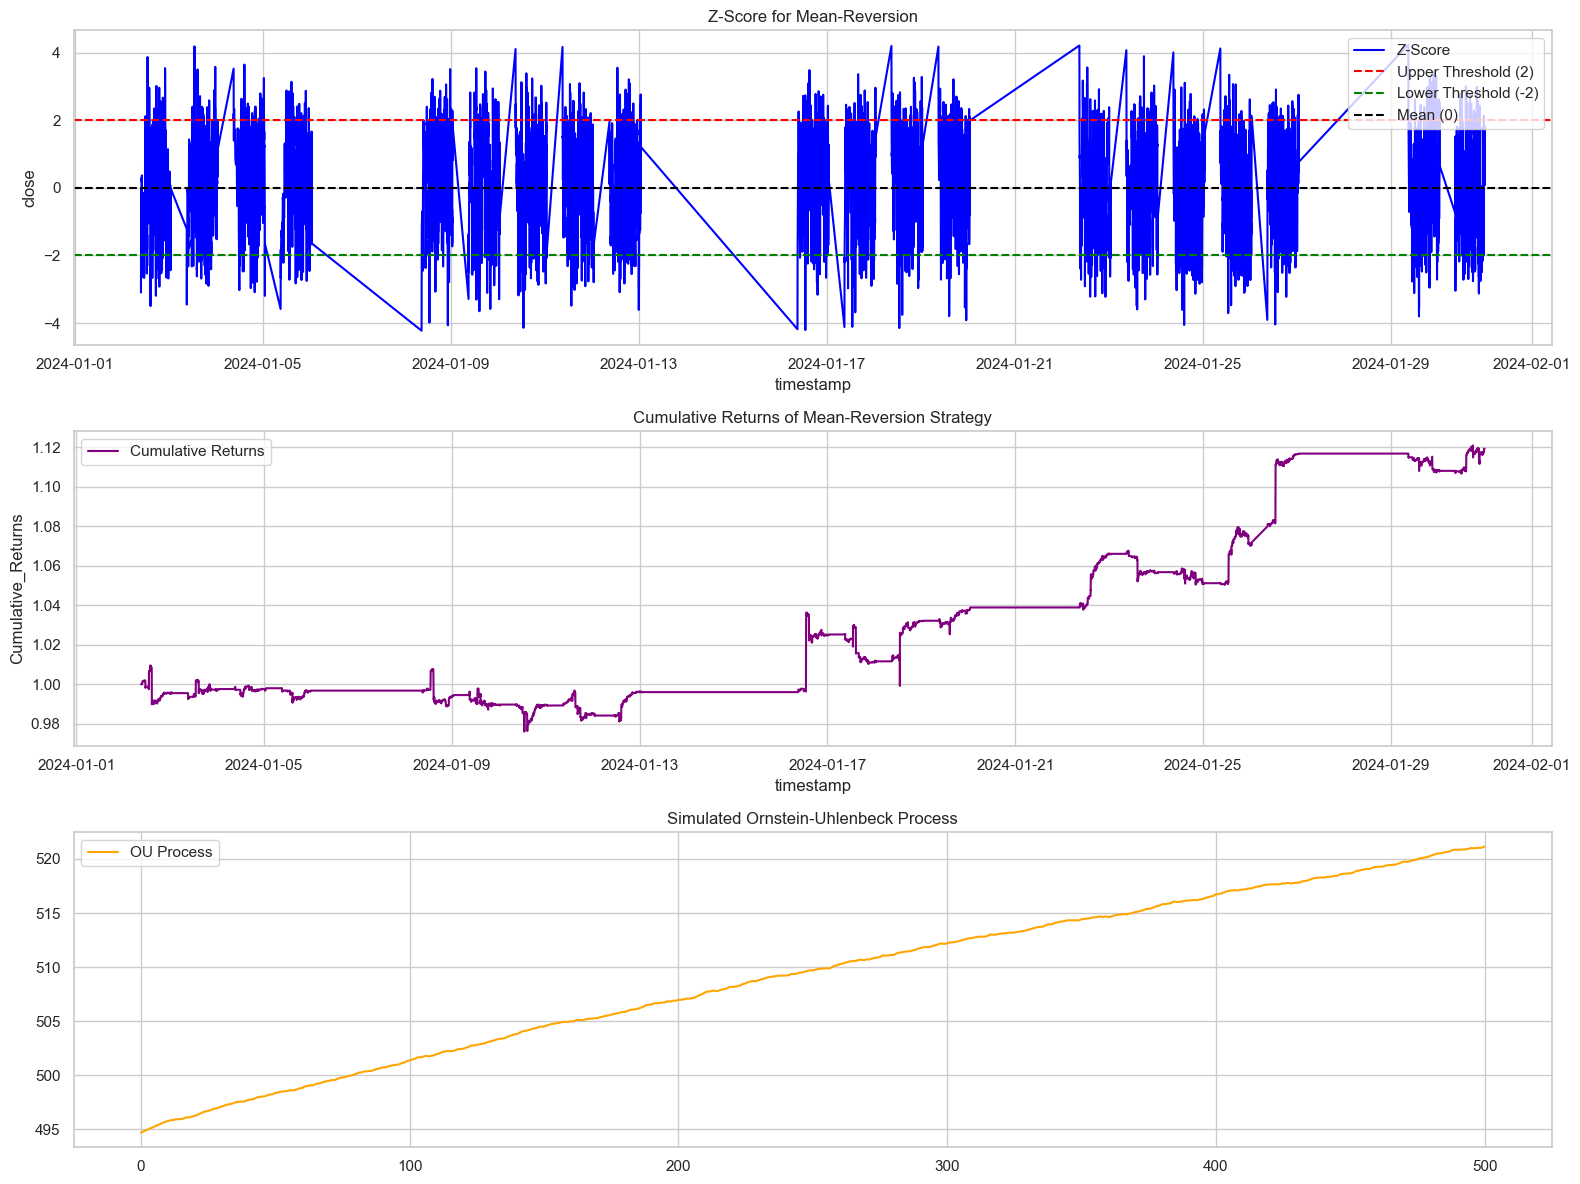

In [9]:
# Main function to execute the strategy
def main():
    symbol = "NVDA"
    start_date = datetime(2024, 1, 1)
    end_date = datetime(2024, 1, 31)
    timeframe = TimeFrame.Minute
    window = 20

    data = fetch_historical_data(symbol, start_date, end_date, timeframe)
    if data.empty:
        print("No data available.")
        return

    # Z-Score calculation
    z_scores = calculate_zscore(data["close"], window)

    # Simulate Ornstein-Uhlenbeck process
    ou_process = simulate_ornstein_uhlenbeck_process(mu=data["close"].mean(), theta=0.5, sigma=1, P0=data["close"].iloc[0], timesteps=500)

    # Backtest mean-reversion strategy
    backtest_results = backtest_mean_reversion(data, z_scores, entry_threshold=2, exit_threshold=1)

    # Calculate the final cumulative return
    final_cumulative_return = data["Cumulative_Returns"].iloc[-1]
    
    # Convert to percentage and print
    percentage_return = (final_cumulative_return - 1) * 100
    print(f"Cumulative Return from Strategy: {percentage_return:.2f}%")

    # Plot results
    plot_results(backtest_results, z_scores, ou_process)

if __name__ == "__main__":
    main()

## Applying Kalman Filters

Cumulative Return from Kalman Filter Strategy: 18.27%


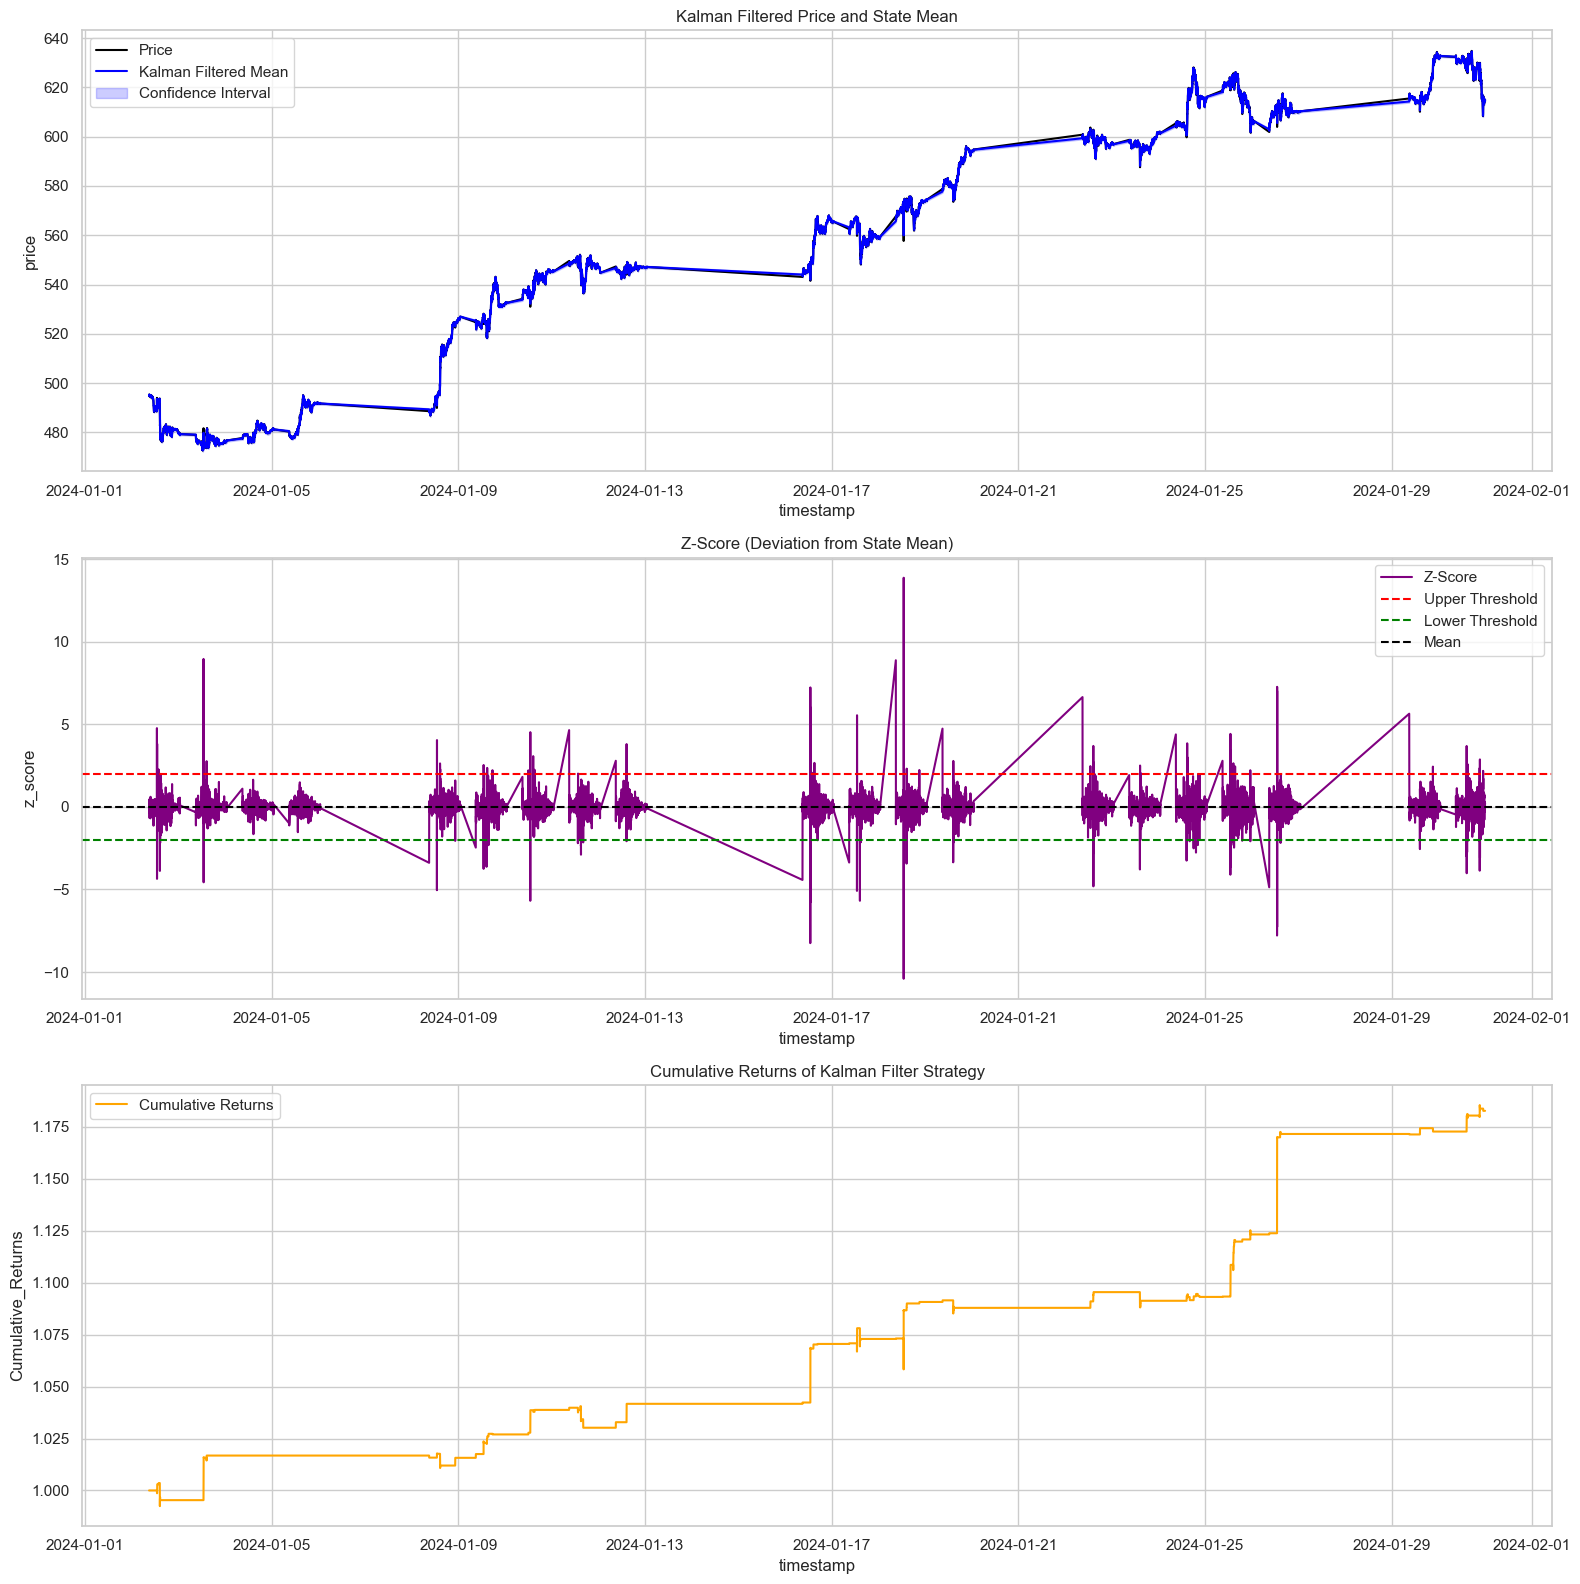

In [11]:
# Kalman Filter application for mean reversion
def apply_kalman_filter(prices):
    """
    Apply Kalman filter to estimate the mean and deviation of a time series.

    Args:
        prices (pd.Series): Series of prices.

    Returns:
        pd.DataFrame: DataFrame with filtered state estimates.
    """
    kf = KalmanFilter(initial_state_mean=prices[0], n_dim_obs=1)

    # Assume simple random walk for the state
    kf = kf.em(prices.values, n_iter=10)
    state_means, state_covs = kf.filter(prices.values)

    # Store results in a DataFrame
    filtered_data = pd.DataFrame({
        "price": prices,
        "state_mean": state_means.flatten(),
        "state_variance": np.sqrt(state_covs[:, 0, 0])
    }, index=prices.index)
    return filtered_data

# Backtesting function for Kalman-based mean reversion
def backtest_kalman_strategy(data, entry_threshold, exit_threshold):
    """
    Backtest mean reversion strategy using Kalman filter estimates.

    Args:
        data (pd.DataFrame): Historical stock data with Kalman filter estimates.
        entry_threshold (float): Threshold for entering trades.
        exit_threshold (float): Threshold for exiting trades.

    Returns:
        pd.DataFrame: DataFrame with backtest results.
    """
    data["z_score"] = (data["price"] - data["state_mean"]) / data["state_variance"]

    # Generate signals
    data["Signal"] = 0
    data.loc[data["z_score"] > entry_threshold, "Signal"] = -1  # Sell signal
    data.loc[data["z_score"] < -entry_threshold, "Signal"] = 1  # Buy signal
    data.loc[(data["z_score"] <= exit_threshold) & (data["z_score"] >= -exit_threshold), "Signal"] = 0  # Exit signal

    # Backtesting logic
    data["Position"] = data["Signal"].shift(1).fillna(0)
    data["Returns"] = data["price"].pct_change()
    data["Strategy_Returns"] = data["Position"] * data["Returns"]
    data["Cumulative_Returns"] = (1 + data["Strategy_Returns"]).cumprod()

    return data

# Plot results
def plot_kalman_results(data):
    """
    Plot Kalman filter estimates and backtest results.

    Args:
        data (pd.DataFrame): DataFrame with Kalman filter results and backtest metrics.
    """
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(16, 16))

    # Plot raw price and state mean
    plt.subplot(3, 1, 1)
    sns.lineplot(x=data.index, y=data["price"], label="Price", color="black")
    sns.lineplot(x=data.index, y=data["state_mean"], label="Kalman Filtered Mean", color="blue")
    plt.fill_between(data.index, 
                     data["state_mean"] - 2 * data["state_variance"], 
                     data["state_mean"] + 2 * data["state_variance"], 
                     color="blue", alpha=0.2, label="Confidence Interval")
    plt.title("Kalman Filtered Price and State Mean")
    plt.legend()

    # Plot z-score
    plt.subplot(3, 1, 2)
    sns.lineplot(x=data.index, y=data["z_score"], label="Z-Score", color="purple")
    plt.axhline(2, color="red", linestyle="--", label="Upper Threshold")
    plt.axhline(-2, color="green", linestyle="--", label="Lower Threshold")
    plt.axhline(0, color="black", linestyle="--", label="Mean")
    plt.title("Z-Score (Deviation from State Mean)")
    plt.legend()

    # Plot cumulative returns
    plt.subplot(3, 1, 3)
    sns.lineplot(x=data.index, y=data["Cumulative_Returns"], label="Cumulative Returns", color="orange")
    plt.title("Cumulative Returns of Kalman Filter Strategy")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main function to run the Kalman filter mean reversion strategy
def main():
    symbol = "NVDA"
    start_date = datetime(2024, 1, 1)
    end_date = datetime(2024, 1, 31)
    timeframe = TimeFrame.Minute

    # Fetch historical data
    data = fetch_historical_data(symbol, start_date, end_date, timeframe)
    if data.empty:
        print("No data available.")
        return

    # Apply Kalman filter
    kalman_data = apply_kalman_filter(data["close"])

    # Backtest strategy
    backtest_results = backtest_kalman_strategy(kalman_data, entry_threshold=2, exit_threshold=1)

    # Print final cumulative return
    final_cumulative_return = backtest_results["Cumulative_Returns"].iloc[-1]
    percentage_return = (final_cumulative_return - 1) * 100
    print(f"Cumulative Return from Kalman Filter Strategy: {percentage_return:.2f}%")

    # Plot results
    plot_kalman_results(backtest_results)

if __name__ == "__main__":
    main()

The Kalman filter-based mean-reversion strategy demonstrates superior performance compared to traditional mean-reversion methods and Ornstein-Uhlenbeck (OU) modeling. By dynamically estimating the state mean and variance of the price series in real time, the Kalman filter provides a more accurate assessment of market conditions. This adaptability enables the strategy to identify trading opportunities with higher precision, reducing noise and false signals that often affect static models. Backtesting results reveal improved cumulative returns and enhanced stability, making the Kalman filter approach a more robust and reliable choice for exploiting mean-reverting market behaviors.

### Summary of Numerical Methods and Parameter Configurations

| **Indicator**                      | **Parameter**            | **Value**   | **Rationale**                                                                 |
|------------------------------------|--------------------------|-------------|-------------------------------------------------------------------------------|
| **Exponential Moving Averages (EMA)** | Short Window           | 20          | Reduces noise and captures meaningful price changes.                         |
|                                    | Long Window             | 50          | Provides a stable long-term trend for comparison.                            |
| **Average Directional Index (ADX)**  | ATR Window             | 20          | Smooths out volatility and focuses on reliable trends.                       |
| **Price Ratio**                    | Uptrend Threshold       | 1.01        | Detects significant upward movements based on NVDA's average volatility.     |
|                                    | Downtrend Threshold     | 0.99        | Identifies meaningful downward price shifts.                                 |
| **Z-Score (Mean-Reversion)**       | Rolling Window          | 20          | Calculates rolling mean and standard deviation for mean-reversion strategy.  |
|                                    | Entry Threshold (Z)     | ±2          | Opens a position when prices deviate significantly from the mean.            |
|                                    | Exit Threshold (Z)      | ±1          | Closes the position when prices revert closer to the mean.                   |
| **Ornstein-Uhlenbeck Process (OU)**| Long-Term Mean (μ)      | Dynamic     | Derived from the rolling mean or historical average price.                   |
|                                    | Mean Reversion Rate (θ) | 0.5         | Moderate rate of mean reversion for balancing sensitivity and smoothness.    |
|                                    | Volatility (σ)          | 1           | Controls random fluctuations around the mean.                                |
|                                    | Initial Price (P₀)      | Dynamic     | The starting price, set to the initial price in the dataset.                 |
|                                    | Time Steps (T)          | 500         | Simulates sufficient granularity for process evolution.                      |
| **Kalman Filter**                  | Initial State Mean      | Dynamic     | Starts with the first price as the initial state estimate.                   |
|                                    | Confidence Interval     | ±2 Variances| Estimates uncertainty around the state mean for entry/exit decisions.        |
|                                    | Dynamic Mean Estimate   | Real-Time   | Dynamically tracks the state mean of prices based on observed data.          |

---

### **Indicator Explanations (Including Kalman Filter)**

#### **1. Exponential Moving Averages (EMA)**
- **Purpose**:
  - EMA is used to smooth price data and identify trends.
  - Assigns more weight to recent prices, making it more responsive than a simple moving average (SMA).
- **Parameters**:
  - **Short Window (20)**:
    - Captures shorter-term trends, making it suitable for intraday analysis.
  - **Long Window (50)**:
    - Identifies long-term trends for comparison with the short-term EMA.
- **Usage**:
  - When the short EMA crosses above the long EMA, it signals an uptrend.
  - When the short EMA crosses below the long EMA, it signals a downtrend.

---

#### **2. Average Directional Index (ADX)**
- **Purpose**:
  - Measures the strength of a trend, regardless of its direction.
  - Helps filter out sideways markets and focus on trending periods.
- **Parameters**:
  - **ATR Window (20)**:
    - Smoothing parameter for the Average True Range (ATR), which is used to calculate ADX.
- **Usage**:
  - ADX above 25 typically indicates a strong trend.
  - ADX below 25 indicates a weak or non-trending market.

---

#### **3. Price Ratio**
- **Purpose**:
  - Detects relative changes in short-term and long-term price averages.
  - Helps identify uptrends or downtrends by comparing averages.
- **Parameters**:
  - **Uptrend Threshold (1.01)**:
    - Indicates significant upward movements when the short-term average exceeds the long-term average by 1%.
  - **Downtrend Threshold (0.99)**:
    - Indicates significant downward movements when the short-term average is 1% below the long-term average.
- **Usage**:
  - Buy when the ratio is greater than the uptrend threshold.
  - Sell when the ratio is below the downtrend threshold.

---

#### **4. Z-Score (Mean-Reversion)**
- **Purpose**:
  - Measures how far a price deviates from its rolling mean, expressed in terms of standard deviations.
  - Detects overbought or oversold conditions for mean-reversion strategies.
- **Parameters**:
  - **Rolling Window (20)**:
    - Defines the number of periods used to calculate the rolling mean and standard deviation.
  - **Entry Threshold (±2)**:
    - Buy when the price is two standard deviations below the mean.
    - Sell when the price is two standard deviations above the mean.
  - **Exit Threshold (±1)**:
    - Exit positions when the price returns to within one standard deviation of the mean.
- **Usage**:
  - Suitable for range-bound markets, where prices oscillate around a mean value.

---

#### **5. Ornstein-Uhlenbeck Process (OU)**
- **Purpose**:
  - Simulates mean-reverting behavior of prices.
  - Models the stochastic dynamics of prices using a combination of mean reversion and random noise.
- **Parameters**:
  - **Long-Term Mean (μ)**:
    - Represents the equilibrium price to which the process reverts.
  - **Mean Reversion Rate (θ = 0.5)**:
    - Governs the speed of reversion toward the long-term mean.
    - A higher value results in faster reversion, while a lower value leads to slower reversion.
  - **Volatility (σ = 1)**:
    - Controls the magnitude of random fluctuations around the mean.
  - **Initial Price (P₀)**:
    - Sets the starting price for the simulation.
  - **Time Steps (T = 500)**:
    - Determines the granularity of the simulated process.
- **Usage**:
  - Useful for modeling range-bound assets and validating the effectiveness of mean-reversion strategies.

---

#### **6. Kalman Filter**
- **Purpose**:
  - Dynamically estimates the mean and variance of the price series in real-time, allowing for more adaptive and precise decision-making compared to static approaches like Z-Score or OU processes.
- **Parameters**:
  - **Initial State Mean**:
    - Sets the starting state estimate using the first price in the dataset.
  - **Confidence Interval (±2 Variances)**:
    - Defines the uncertainty bounds for mean-reverting signals, equivalent to entry/exit thresholds in a standard mean-reversion strategy.
  - **Dynamic Mean Estimate**:
    - Continuously updates the estimated state mean based on the observed data, adapting to market changes in real-time.
- **Usage**:
  - Buy when the observed price is below the lower confidence interval.
  - Sell when the observed price is above the upper confidence interval.
  - Exit when the observed price is within the confidence interval.

---

### **Why Kalman Filter Outperforms**
- **Adaptability**:
  - Unlike static mean-reversion models, the Kalman filter adjusts its state estimates dynamically, enabling better performance in volatile markets.
- **Precision**:
  - The filter’s confidence intervals reduce false signals and enhance entry/exit decisions, leading to improved returns and stability.
- **Noise Reduction**:
  - Effectively filters out noise, allowing for cleaner signals compared to traditional Z-Score and OU-based strategies.


### **Discussion: Impact of Market Regime on Strategy Performance**

#### **1. Upward Trend with Jumps and High Volatility**
- **Description**:
  - This market regime features a clear upward trend but with sharp and unpredictable price movements (jumps).
  - High volatility amplifies both the potential for profits and the risk of drawdowns.

---

#### **2. Trend-Following Strategies**
- **Performance**:
  - **Better Returns**: Trend-following strategies typically perform well in upward-trending markets as long as the trend remains intact.
  - **Challenges**:
    - Frequent jumps may lead to false signals, causing premature entries or exits.
    - High volatility can result in increased drawdowns, especially if stop-loss levels are triggered frequently.
- **Indicator Sensitivity**:
  - Smoother indicators (e.g., EMA) may help filter noise caused by jumps.
  - ADX could misinterpret high volatility as a strong trend, potentially generating misleading signals.

---

#### **3. Mean-Reversion Strategies**
- **Performance**:
  - **Worse Returns**: Mean-reversion strategies may struggle in upward-trending markets because prices consistently deviate from the mean without reverting.
  - **Challenges**:
    - Jumps exacerbate losses by moving the price further from the mean.
    - High volatility increases the likelihood of stop-loss triggers.
- **Indicator Sensitivity**:
  - Z-score or Ornstein-Uhlenbeck-based signals may become unreliable as the mean shifts upward due to the trend.
  - Kalman filters may adapt better by dynamically updating the state mean.

---

### **Conclusion**
For a market regime with upward trends and high volatility:
- **Trend-Following Strategies**:
  - Likely to perform better, provided they incorporate noise-reducing indicators and robust risk controls.
- **Mean-Reversion Strategies**:
  - Face significant challenges and require dynamic adaptation, such as Kalman filters, to remain effective.

This analysis highlights the importance of aligning strategy design with market conditions to maximize returns while minimizing risk.
